In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mse

In [2]:
link="https://docs.google.com/spreadsheets/d/e/2PACX-1vSHmoEGdf3Oghhv-H4_rVe1b4vckt7I_ov1LvdPhtk1mR_wckbJrA8aPJJsjH4F4h2KscsJcF1k1BFX/pub?gid=0&single=true&output=csv"
df=pd.read_csv(link)

In [3]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0,1
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0,1
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0,1
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0,1
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0,1
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0,1
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0,1
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0,1


In [4]:
df['date']

0       2016-06-14 00:00:00+00:00
1       2016-06-15 00:00:00+00:00
2       2016-06-16 00:00:00+00:00
3       2016-06-17 00:00:00+00:00
4       2016-06-20 00:00:00+00:00
                  ...            
1253    2021-06-07 00:00:00+00:00
1254    2021-06-08 00:00:00+00:00
1255    2021-06-09 00:00:00+00:00
1256    2021-06-10 00:00:00+00:00
1257    2021-06-11 00:00:00+00:00
Name: date, Length: 1258, dtype: object

In [5]:
df=df[['date','close']]

In [6]:
t=df

In [7]:
def date_clean(s):
    s_dateonly=''
    for i in range(10):
        s_dateonly=s_dateonly+(s[i])
    return str(s_dateonly)

In [8]:
df

,date,close
0,2016-06-14 00:00:00+00:00,718.27
1,2016-06-15 00:00:00+00:00,718.92
2,2016-06-16 00:00:00+00:00,710.36
3,2016-06-17 00:00:00+00:00,691.72
4,2016-06-20 00:00:00+00:00,693.71
...,...,...
1253,2021-06-07 00:00:00+00:00,2466.09
1254,2021-06-08 00:00:00+00:00,2482.85
1255,2021-06-09 00:00:00+00:00,2491.40
1256,2021-06-10 00:00:00+00:00,2521.60


In [9]:
df['date']

0       2016-06-14 00:00:00+00:00
1       2016-06-15 00:00:00+00:00
2       2016-06-16 00:00:00+00:00
3       2016-06-17 00:00:00+00:00
4       2016-06-20 00:00:00+00:00
                  ...            
1253    2021-06-07 00:00:00+00:00
1254    2021-06-08 00:00:00+00:00
1255    2021-06-09 00:00:00+00:00
1256    2021-06-10 00:00:00+00:00
1257    2021-06-11 00:00:00+00:00
Name: date, Length: 1258, dtype: object

In [10]:
df['date']=pd.to_datetime(df['date'])



C:\Users\VICTUS\AppData\Local\Temp\ipykernel_2732\1977247135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']=pd.to_datetime(df['date'])


In [11]:
df['date'].dtype


datetime64[ns, UTC]

In [12]:
df.dtypes

date     datetime64[ns, UTC]
close                float64
dtype: object

In [13]:
df

,date,close
0,2016-06-14 00:00:00+00:00,718.27
1,2016-06-15 00:00:00+00:00,718.92
2,2016-06-16 00:00:00+00:00,710.36
3,2016-06-17 00:00:00+00:00,691.72
4,2016-06-20 00:00:00+00:00,693.71
...,...,...
1253,2021-06-07 00:00:00+00:00,2466.09
1254,2021-06-08 00:00:00+00:00,2482.85
1255,2021-06-09 00:00:00+00:00,2491.40
1256,2021-06-10 00:00:00+00:00,2521.60


In [14]:
df['x1']=df['close'].shift(-1)
df['x2']=df['x1'].shift(-1)
df['y']=df['x2'].shift(-1)

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_2732\256070963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x1']=df['close'].shift(-1)
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_2732\256070963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x2']=df['x1'].shift(-1)
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_2732\256070963.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [15]:
df

,date,close,x1,x2,y
0,2016-06-14 00:00:00+00:00,718.27,718.92,710.36,691.72
1,2016-06-15 00:00:00+00:00,718.92,710.36,691.72,693.71
2,2016-06-16 00:00:00+00:00,710.36,691.72,693.71,695.94
3,2016-06-17 00:00:00+00:00,691.72,693.71,695.94,697.46
4,2016-06-20 00:00:00+00:00,693.71,695.94,697.46,701.87
...,...,...,...,...,...
1253,2021-06-07 00:00:00+00:00,2466.09,2482.85,2491.40,2521.60
1254,2021-06-08 00:00:00+00:00,2482.85,2491.40,2521.60,2513.93
1255,2021-06-09 00:00:00+00:00,2491.40,2521.60,2513.93,NaN
1256,2021-06-10 00:00:00+00:00,2521.60,2513.93,NaN,NaN


In [16]:
arr=np.array(df)

In [17]:
arr

array([[Timestamp('2016-06-14 00:00:00+0000', tz='UTC'), 718.27, 718.92,
        710.36, 691.72],
       [Timestamp('2016-06-15 00:00:00+0000', tz='UTC'), 718.92, 710.36,
        691.72, 693.71],
       [Timestamp('2016-06-16 00:00:00+0000', tz='UTC'), 710.36, 691.72,
        693.71, 695.94],
       ...,
       [Timestamp('2021-06-09 00:00:00+0000', tz='UTC'), 2491.4, 2521.6,
        2513.93, nan],
       [Timestamp('2021-06-10 00:00:00+0000', tz='UTC'), 2521.6, 2513.93,
        nan, nan],
       [Timestamp('2021-06-11 00:00:00+0000', tz='UTC'), 2513.93, nan,
        nan, nan]], dtype=object)

In [18]:
for i in range(len(arr)-3):
    arr[i][0]=arr[i+3][0]

    

In [19]:
arr

array([[Timestamp('2016-06-17 00:00:00+0000', tz='UTC'), 718.27, 718.92,
        710.36, 691.72],
       [Timestamp('2016-06-20 00:00:00+0000', tz='UTC'), 718.92, 710.36,
        691.72, 693.71],
       [Timestamp('2016-06-21 00:00:00+0000', tz='UTC'), 710.36, 691.72,
        693.71, 695.94],
       ...,
       [Timestamp('2021-06-09 00:00:00+0000', tz='UTC'), 2491.4, 2521.6,
        2513.93, nan],
       [Timestamp('2021-06-10 00:00:00+0000', tz='UTC'), 2521.6, 2513.93,
        nan, nan],
       [Timestamp('2021-06-11 00:00:00+0000', tz='UTC'), 2513.93, nan,
        nan, nan]], dtype=object)

In [20]:
df=pd.DataFrame(arr)

In [21]:
df

,0,1,2,3,4
0,2016-06-17 00:00:00+00:00,718.27,718.92,710.36,691.72
1,2016-06-20 00:00:00+00:00,718.92,710.36,691.72,693.71
2,2016-06-21 00:00:00+00:00,710.36,691.72,693.71,695.94
3,2016-06-22 00:00:00+00:00,691.72,693.71,695.94,697.46
4,2016-06-23 00:00:00+00:00,693.71,695.94,697.46,701.87
...,...,...,...,...,...
1253,2021-06-10 00:00:00+00:00,2466.09,2482.85,2491.4,2521.6
1254,2021-06-11 00:00:00+00:00,2482.85,2491.4,2521.6,2513.93
1255,2021-06-09 00:00:00+00:00,2491.4,2521.6,2513.93,NaN
1256,2021-06-10 00:00:00+00:00,2521.6,2513.93,NaN,NaN


In [22]:
df=df.dropna()

In [23]:
df

,0,1,2,3,4
0,2016-06-17 00:00:00+00:00,718.27,718.92,710.36,691.72
1,2016-06-20 00:00:00+00:00,718.92,710.36,691.72,693.71
2,2016-06-21 00:00:00+00:00,710.36,691.72,693.71,695.94
3,2016-06-22 00:00:00+00:00,691.72,693.71,695.94,697.46
4,2016-06-23 00:00:00+00:00,693.71,695.94,697.46,701.87
...,...,...,...,...,...
1250,2021-06-07 00:00:00+00:00,2421.28,2404.61,2451.76,2466.09
1251,2021-06-08 00:00:00+00:00,2404.61,2451.76,2466.09,2482.85
1252,2021-06-09 00:00:00+00:00,2451.76,2466.09,2482.85,2491.4
1253,2021-06-10 00:00:00+00:00,2466.09,2482.85,2491.4,2521.6


In [24]:
dates=df[0]

In [25]:
arr=np.array(df)

In [26]:
arr

array([[Timestamp('2016-06-17 00:00:00+0000', tz='UTC'), 718.27, 718.92,
        710.36, 691.72],
       [Timestamp('2016-06-20 00:00:00+0000', tz='UTC'), 718.92, 710.36,
        691.72, 693.71],
       [Timestamp('2016-06-21 00:00:00+0000', tz='UTC'), 710.36, 691.72,
        693.71, 695.94],
       ...,
       [Timestamp('2021-06-09 00:00:00+0000', tz='UTC'), 2451.76,
        2466.09, 2482.85, 2491.4],
       [Timestamp('2021-06-10 00:00:00+0000', tz='UTC'), 2466.09,
        2482.85, 2491.4, 2521.6],
       [Timestamp('2021-06-11 00:00:00+0000', tz='UTC'), 2482.85, 2491.4,
        2521.6, 2513.93]], dtype=object)

In [27]:
train,test=train_test_split(arr,test_size=0.3,random_state=1)
test,val=train_test_split(test,test_size=0.5,random_state=1)

In [28]:
train.shape

(878, 5)

In [29]:
test.shape

(188, 5)

In [30]:
train=pd.DataFrame(train)

In [31]:
test=pd.DataFrame(test)
val=pd.DataFrame(val)

In [32]:
train

,0,1,2,3,4
0,2021-05-04 00:00:00+00:00,2429.89,2410.12,2395.17,2354.25
1,2020-09-02 00:00:00+00:00,1644.41,1634.18,1660.71,1728.28
2,2020-04-29 00:00:00+00:00,1279.31,1275.88,1233.67,1341.48
3,2017-10-06 00:00:00+00:00,957.79,951.68,969.96,978.89
4,2018-04-05 00:00:00+00:00,1006.47,1013.41,1025.14,1027.81
...,...,...,...,...,...
873,2019-04-23 00:00:00+00:00,1236.34,1236.37,1248.84,1264.55
874,2020-01-23 00:00:00+00:00,1480.39,1484.4,1485.95,1486.65
875,2020-10-23 00:00:00+00:00,1555.93,1593.31,1615.33,1641.0
876,2017-05-24 00:00:00+00:00,934.01,941.86,948.82,954.96


In [33]:
train=train.set_index(train[0])

In [34]:
train

,0,1,2,3,4
0,,,,,
2021-05-04 00:00:00+00:00,2021-05-04 00:00:00+00:00,2429.89,2410.12,2395.17,2354.25
2020-09-02 00:00:00+00:00,2020-09-02 00:00:00+00:00,1644.41,1634.18,1660.71,1728.28
2020-04-29 00:00:00+00:00,2020-04-29 00:00:00+00:00,1279.31,1275.88,1233.67,1341.48
2017-10-06 00:00:00+00:00,2017-10-06 00:00:00+00:00,957.79,951.68,969.96,978.89
2018-04-05 00:00:00+00:00,2018-04-05 00:00:00+00:00,1006.47,1013.41,1025.14,1027.81
...,...,...,...,...,...
2019-04-23 00:00:00+00:00,2019-04-23 00:00:00+00:00,1236.34,1236.37,1248.84,1264.55
2020-01-23 00:00:00+00:00,2020-01-23 00:00:00+00:00,1480.39,1484.4,1485.95,1486.65
2020-10-23 00:00:00+00:00,2020-10-23 00:00:00+00:00,1555.93,1593.31,1615.33,1641.0


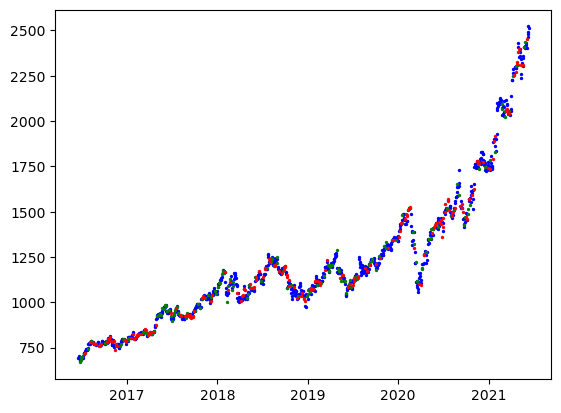

In [64]:
plt.scatter(train[0],train[4],s=2,color='blue')

plt.scatter(val[0],val[4],s=2,color='green')
plt.scatter(test[0],test[4],s=2,color='red')

In [65]:
x_train=train[[1,2,3]]

In [66]:
x_train
x_train=x_train.astype(np.float32)
x_train

,1,2,3
0,,,
2021-05-04 00:00:00+00:00,2429.889893,2410.120117,2395.169922
2020-09-02 00:00:00+00:00,1644.410034,1634.180054,1660.709961
2020-04-29 00:00:00+00:00,1279.310059,1275.880005,1233.670044
2017-10-06 00:00:00+00:00,957.789978,951.679993,969.960022
2018-04-05 00:00:00+00:00,1006.469971,1013.409973,1025.140015
...,...,...,...
2019-04-23 00:00:00+00:00,1236.339966,1236.369995,1248.839966
2020-01-23 00:00:00+00:00,1480.390015,1484.400024,1485.949951
2020-10-23 00:00:00+00:00,1555.930054,1593.310059,1615.329956


In [67]:
y_train=train[4]

In [68]:
y_train=y_train.astype(np.float32)
y_train

0
2021-05-04 00:00:00+00:00    2354.250000
2020-09-02 00:00:00+00:00    1728.280029
2020-04-29 00:00:00+00:00    1341.479980
2017-10-06 00:00:00+00:00     978.890015
2018-04-05 00:00:00+00:00    1027.810059
                                ...     
2019-04-23 00:00:00+00:00    1264.550049
2020-01-23 00:00:00+00:00    1486.650024
2020-10-23 00:00:00+00:00    1641.000000
2017-05-24 00:00:00+00:00     954.960022
2020-09-03 00:00:00+00:00    1641.839966
Name: 4, Length: 878, dtype: float32

In [69]:
x_test=test[[1,2,3]]

In [70]:
y_test=test[4]

In [71]:
x_val=val[[1,2,3]]
y_val=val[4]

In [72]:
x_test=np.array(x_test)
y_test=np.array(y_test)
x_train=np.array(x_train)
y_train=np.array(y_train)
x_val=np.array(x_val)
y_val=np.array(y_val)

In [73]:
x_test
x_test=x_test.astype(np.float32)

In [74]:
y_test=y_test.astype(np.float32)

In [75]:
x_val=x_val.astype(np.float32)
y_val=y_val.astype(np.float32)

In [76]:
model=Sequential(
    [
        Input(shape=(3,1)),
        LSTM(units=64),
        Dense(32,activation='relu'),
        Dense(16,activation='relu'),
        Dense(1)

    ]
)

In [77]:
model.compile(loss='mse',optimizer='adam',metrics=['mean_absolute_error'])


In [78]:
x_train=tf.convert_to_tensor(x_train)

In [79]:
model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=150,batch_size=50)

Epoch 1/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 1629552.1250 - mean_absolute_error: 1218.2336 - val_loss: 1503439.8750 - val_mean_absolute_error: 1176.6816
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1749422.5000 - mean_absolute_error: 1253.9733 - val_loss: 1499431.5000 - val_mean_absolute_error: 1174.9763
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1600905.0000 - mean_absolute_error: 1205.6522 - val_loss: 1493045.6250 - val_mean_absolute_error: 1172.2562
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1582543.7500 - mean_absolute_error: 1203.6783 - val_loss: 1483352.8750 - val_mean_absolute_error: 1168.1146
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1631411.8750 - mean_absolute_error: 1216.1689 - val_loss: 1468086.7500 - val_mean_absolute_error: 1161.5619
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1591881.7500 - mean_absolute_error: 1201.5106 - val_loss: 1444956.7500 - val_mean_absolute_error: 1151.56

In [80]:
pred_test=model.predict(x_test)
pred_train=model.predict(x_train)
pred_val=model.predict(x_val)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [81]:
loss_test, mae_test = model.evaluate(x_test, y_test)
loss_train, mae_train = model.evaluate(x_train, y_train)
loss_val, mae_val = model.evaluate(x_val, y_val)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 595.0408 - mean_absolute_error: 17.0918 
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 849.4533 - mean_absolute_error: 19.4282
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 587.7095 - mean_absolute_error: 17.5291 


In [82]:
print(f'loss on training set = {loss_train}')
print(f'loss on testing set = {loss_test}')
print(f'loss on validation set = {loss_val}')

loss on training set = 769.1571655273438
loss on testing set = 556.7305908203125
loss on validation set = 609.4967041015625


In [83]:
print(f'mae on training set = {mae_train}')
print(f'mae on testing set = {mae_test}')
print(f'mae on validation set = {mae_val}')

mae on training set = 18.65850830078125
mae on testing set = 16.78806495666504
mae on validation set = 17.50616455078125


In [84]:
pred_train=pd.DataFrame(pred_train)
pred_test=pd.DataFrame(pred_test)
pred_val=pd.DataFrame(pred_val)

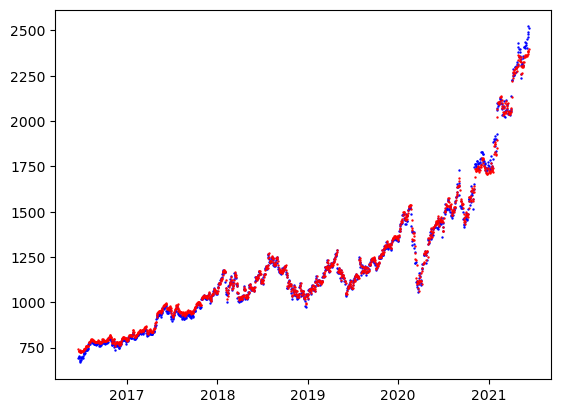

In [95]:
plt.scatter(train[0],y_train,s=0.5,color='b')
plt.scatter(test[0],y_test,s=0.5,color='b')
plt.scatter(val[0],y_val,s=0.5,color='b')
plt.scatter(train[0],pred_train,s=0.5,color='r')
plt.scatter(test[0],pred_test,s=0.5,color='r')
plt.scatter(val[0],pred_val,s=0.5,color='r')
plt.show()

In [88]:
sum=pred_test[0].sum()
mean_value=sum/186

In [96]:
error=(mae_test/mean_value)*100

In [97]:
error

1.3403632090207445